# Load and manipulate data

In [52]:
library(ggplot2); packageVersion("ggplot2")
library(tidyr)
library(dplyr)
library(repr)
library(reshape2)
library(scales)
library(stats)
library(viridis)
library(RColorBrewer)

options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

#colorblind color vector for taxonomy plots
colors <- c("#89C5DA", "#DA5724", "#74D944", "#CE50CA", "#3F4921", "#C0717C", "#CBD588", "#5F7FC7", 
            "#673770", "#D3D93E", "#38333E", "#508578", "#D7C1B1", "#689030", "#AD6F3B", "#CD9BCD", 
            "#D14285", "#6DDE88", "#652926", "#7FDCC0", "#C84248", "#8569D5", "#5E738F", "#D1A33D", 
            "#8A7C64", "#599861", "orange", "666666", "gray80", "#FFCC00")

[1] ‘3.4.2’

In [53]:
fcm <- read.table("~/data/awtp2/amplicon_16S/fcm_data.csv", sep=",", header=TRUE)
fcm$location_code <- ifelse(fcm$location_code == 'influent', "WW_3ary", fcm$location_code)

In [54]:
# calculate geometric means
fcm$TCC <- apply(fcm[ , c("TCC_rep1_cells_per_mL", "TCC_rep2_cells_per_mL", "TCC_rep3_cells_per_mL")], 1, function(x) exp(mean(log(x))))
fcm$ICC <- apply(fcm[ , c("ICC_rep1_cells_per_mL", "ICC_rep2_cells_per_mL", "ICC_rep3_cells_per_mL")], 1, function(x) exp(mean(log(x))))
                 
fcm <- fcm[ , c("day", "location_code", "TCC", "ICC")]
#write.table(fcm, "~/data/awtp2_16S/fcm_data_geomean.tsv", sep='\t', quote=FALSE)

In [55]:
fcm$location_gen <- fcm$location_code
#fcm$location_gen <- ifelse(fcm$location_gen == 'influent', "WW_3ary", fcm$location_gen)
fcm$location_gen <- ifelse(fcm$location_gen == 'ozone', "Ozone", fcm$location_gen)
fcm$location_gen <- ifelse(fcm$location_gen == 'MF_combined', "MF", fcm$location_gen) #_and_UF
fcm$location_gen <- ifelse(fcm$location_gen == 'RO_2stage', "RO", fcm$location_gen)
fcm$location_gen <- ifelse(fcm$location_gen == 'RO_3stage', "RO", fcm$location_gen)
fcm$location_gen <- ifelse(fcm$location_gen == 'RO_combined', "RO", fcm$location_gen)
fcm <- fcm[ , c("day", "location_gen", 'location_code', "TCC", "ICC")]
location_levels = c(
    'WW_3ary',
    'Ozone',
    'BAC',
    'MF', #_and_UF
    'RO',
    'AOP')
fcm$location_gen <- factor(fcm$location_gen, levels=location_levels)

In [56]:
# fcm$location_code <- ifelse(fcm$location_code == 'influent', "WW_3ary", fcm$location_code)

# location_levels = c(
#     'WW_3ary',
#     'ozone',
#     'BAC',
#     'MF_combined',
#     'RO_2stage',
#     'RO_3stage',
#     'RO_combined',
#     'AOP')
# fcm$location_code <- factor(fcm$location_code, levels=location_levels)

# Plot TCC and ICC

In [57]:
fcm <- fcm %>% arrange(location_gen, location_code, day)
# write.table(fcm, '~/data/awtp2/nonseq_data/fcm_for_AWTP2_final.tsv', sep='\t', row.names=FALSE)

In [58]:
#fcm <- fcm %>% filter(!location_code %in% c("RO_3stage", "RO_combined")) # drop two RO locations
fcm_melt <- fcm %>% select(-location_code)
fcm_melt <- melt(fcm_melt, id.vars = c("day", "location_gen"), value.name = "Values", variable.name = "Assay")
#                  fcm_melt$location_code <- factor(fcm_melt$location_code, levels=c("influent", "ozone", "BAC", 
#                                                         "MF_combined", 'RO_2stage', "AOP"))

Warning message:
“Removed 24 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 24 rows containing missing values (`geom_point()`).”


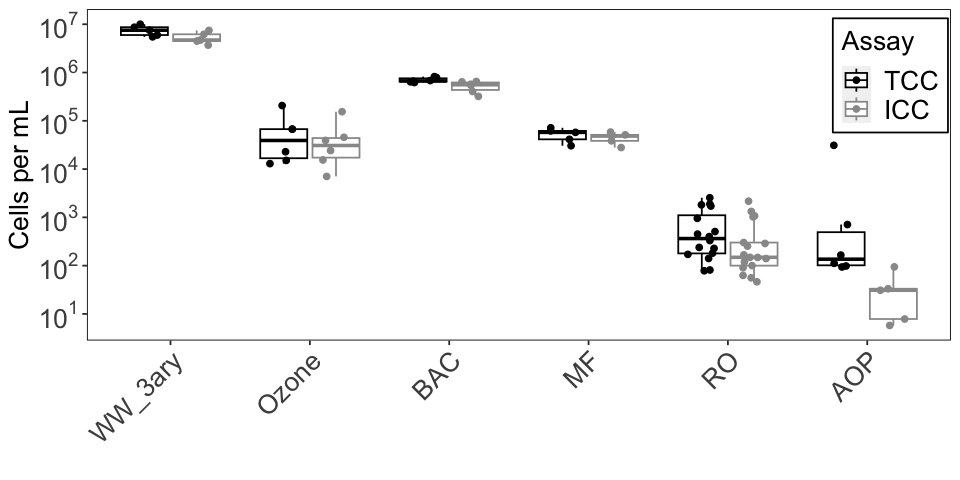

In [59]:
# plot FCM data
options(repr.plot.width = 8, repr.plot.height = 4) #for plotting size in jupyter
ggplot(fcm_melt, aes(x=location_gen, y=Values, color=Assay))+
    geom_boxplot(size = 0.5, outlier.shape = NA) +
    geom_point(position=position_jitterdodge())+
    scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
                labels = trans_format("log10", math_format(10^.x))) +
    scale_color_manual(values = c("black", "gray60"))+
    xlab("")+
    ylab("Cells per mL") +
    theme(panel.background=element_blank(), 
          panel.border=element_rect(color = "black", fill = NA),  
          axis.text.x = element_text(angle = 45, hjust = 1, size=16),
          axis.text.y = element_text(size=16),
          axis.title.y=element_text(size=16),
          legend.position = c(.93,.80),
          legend.title=element_text(size=16),
          legend.text=element_text(size=16),
          legend.background = element_rect(linetype="solid", 
                                  colour ="black")) 

# ggsave("~/data/awtp2/nonseq_data/figures/fcm_awpt2_boxplots_blackgray.pdf", device="pdf", width=8, height=4)
# ggsave("~/data/awtp2/nonseq_data/figures/fcm_awpt2_boxplots_blackgray.png", device="png", width=8, height=4)

# Calculate and plot percent intact

In [60]:
fcm$perc_intact <- 100* fcm$ICC / fcm$TCC

Warning message:
“Removed 14 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 14 rows containing missing values (`geom_point()`).”


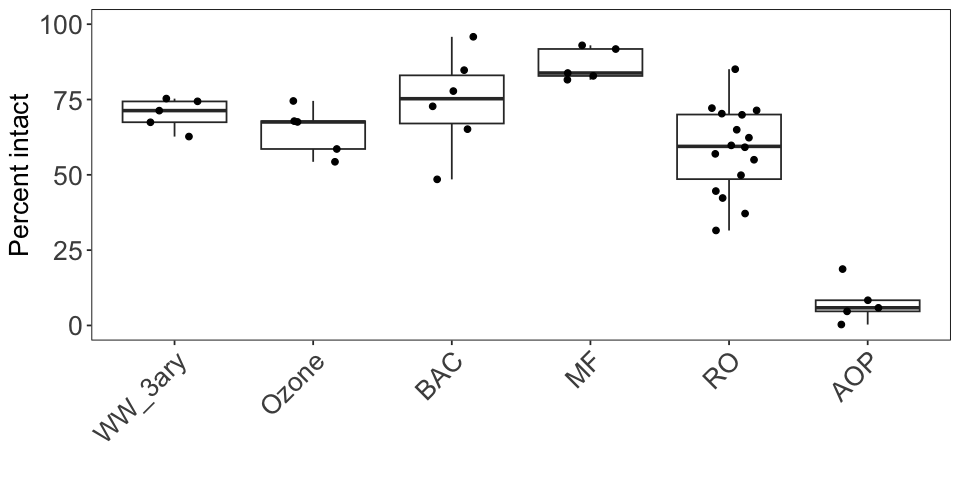

In [61]:
ggplot(fcm, aes(x=location_gen, y=perc_intact))+
    geom_boxplot(size = 0.5, outlier.shape = NA) +
    geom_jitter(width=.2)+
    ylim(0,100)+
    xlab("")+
    ylab("Percent intact") +
    theme(panel.background=element_blank(), 
          panel.border=element_rect(color = "black", fill = NA),  
          axis.text.x = element_text(angle = 45, hjust = 1, size=16),
          axis.text.y = element_text(size=16),
          axis.title.y=element_text(size=16)) 
# ggsave("~/data/awtp2/nonseq_data/figures/fcm_awpt2_perc_intact.pdf", device="pdf", width=8, height=4)
# ggsave("~/data/awtp2/nonseq_data/figures/fcm_awpt2_perc_intact.png", device="png", width=8, height=4)

# Test for significant differences in percent intact

In [62]:
fcm %>% 
    drop_na() %>% 
    group_by(location_gen) %>% 
    summarize(min_perc_intact=round(min(perc_intact)),
              max_perc_intact=round(max(perc_intact)),
              mean_perc_intact=round(mean(perc_intact)))

location_gen,min_perc_intact,max_perc_intact,mean_perc_intact
<fct>,<dbl>,<dbl>,<dbl>
WW_3ary,63,75,70
Ozone,54,160,80
BAC,48,96,74
MF,82,93,87
RO,32,85,58
AOP,0,19,8


In [63]:
# test whether perc_intact is normally distributed for each group
fcm %>% 
    drop_na() %>% 
    group_by(location_gen) %>% 
    summarise(`W Stat` = shapiro.test(perc_intact)$statistic,
            p.value = shapiro.test(perc_intact)$p.value)

location_gen,W Stat,p.value
<fct>,<dbl>,<dbl>
WW_3ary,0.9298774,0.59553475
Ozone,0.6691537,0.00287694
BAC,0.9901152,0.98945347
MF,0.8268797,0.13179214
RO,0.9764138,0.92874627
AOP,0.9123869,0.48206663


In [64]:
pairwise.t.test(x=fcm$perc_intact, g=fcm$location_gen, p.adjust.method='BH')


	Pairwise comparisons using t tests with pooled SD 

data:  fcm$perc_intact and fcm$location_gen 

      WW_3ary Ozone   BAC     MF      RO     
Ozone 0.461   -       -       -       -      
BAC   0.730   0.627   -       -       -      
MF    0.284   0.627   0.372   -       -      
RO    0.323   0.036   0.153   0.012   -      
AOP   1.4e-05 9.9e-07 3.8e-06 9.1e-07 1.4e-05

P value adjustment method: BH 

# Compare cell counts and richness (ASVs)

In [65]:
# the metadata table has the sample codes ("SD00X") and the asv_counts has number of ASV corresponding to sample code
# merge everything together to get asv counts into the fcm table
metadata_complete <- read.table('~/data/awtp2/amplicon_16S/metadata_final.tsv', sep="\t", header=TRUE, row.names=1)
asv_counts <- read.table('~/data/awtp2/amplicon_16S/asv_count.tsv', sep='\t', header=TRUE, row.names=1)
metadata_complete$sample_date <- as.Date(metadata_complete$sample_date, format = "%Y-%m-%d")
day0 <- as.Date("2017-9-14") # This is the first day of sampling
metadata_complete$sample_day <- as.numeric(metadata_complete$sample_date - day0)
codes2names <- metadata_complete %>% filter(project_type=='DPWF') %>% select(sample_day, location_code) 
names2asvs <- merge(codes2names, asv_counts, by=0) %>% select(-Row.names)
names2asvs$location_code <- ifelse(names2asvs$location_code == 'WW_tertiary', "WW_3ary", names2asvs$location_code)

head(names2asvs)

,sample_day,location_code,asv_count
,<dbl>,<chr>,<int>
1,118,RO_BF_separator,260
2,61,MF_combined,254
3,26,BAC,600
4,328,RO_BF_retentate_scrapings,260
5,91,BAC,612
6,61,WW_3ary,690


In [66]:
df <- merge(fcm, names2asvs, by.x=c('day', 'location_code'), by.y=c('sample_day', 'location_code'))

Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


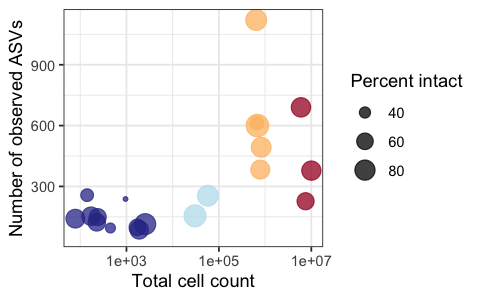

In [72]:
options(repr.plot.width = 4, repr.plot.height = 2.5) #for plotting size in jupyter

ggplot(df, aes(x=TCC, y=asv_count, color=location_gen, size=perc_intact))+
geom_point(alpha=0.75)+
xlab('Total cell count')+
ylab('Number of observed ASVs')+
scale_x_log10()+
#scale_y_log10()+
scale_color_manual(values=colorRampPalette(brewer.pal(11, "RdYlBu"))(4))+ # colors
guides(color =FALSE,# guide_legend(title = "Location")
       size = guide_legend(title = "Percent intact"))+
theme_bw()

#ggsave('~/data/awtp2/amplicon_16S/figures/asv_count_vs_TCC.png', width=4, height = 2.5)

In [45]:
colorRampPalette(brewer.pal(11, "RdYlBu"))(4)

[1] "#A50026" "#FDBE70" "#BCE1EE" "#313695"

In [76]:
# try with shannon instead of ASV counts
shannon <- read.table('~/data/awtp2/amplicon_16S/asv_shannon.tsv', sep="\t", header=TRUE, row.names=1)

shannon_fcm_df <- merge(fcm, shannon, by.x=c('day', 'location_code'), by.y=c('sample_day', 'location_code'))

head(shannon_fcm_df)

,day,location_code,location_gen,TCC,ICC,perc_intact,shannon
,<int>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,BAC,BAC,8.226711e+05,639924.7674,77.78622,4.796105
2,0,RO_3stage,RO,9.545671e+02,300.8433,31.51620,3.718683
3,0,WW_3ary,WW_3ary,1.002550e+07,7455535.8237,74.36574,3.984944
4,12,BAC,BAC,7.861974e+05,571925.2632,72.74575,4.341498
5,12,RO_2stage,RO,1.714898e+03,1024.7491,59.75568,2.189073
6,12,RO_3stage,RO,2.546298e+03,2165.9657,85.06333,2.168351


Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


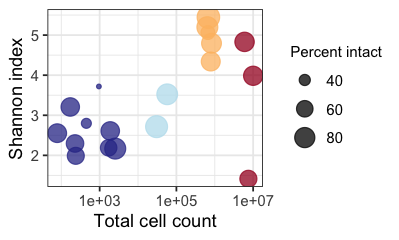

In [86]:
options(repr.plot.width = 3.33, repr.plot.height = 2) #for plotting size in jupyter

ggplot(shannon_fcm_df, aes(x=TCC, y=shannon, color=location_gen, size=perc_intact))+
geom_point(alpha=0.75)+
xlab('Total cell count')+
ylab('Shannon index')+
scale_x_log10()+
#scale_y_log10()+
scale_color_manual(values=colorRampPalette(brewer.pal(11, "RdYlBu"))(4))+ # colors
guides(color =FALSE,# guide_legend(title = "Location")
       size = guide_legend(title = "Percent intact"))+
theme_bw()+
theme(axis.text.x = element_text(size=9),
      axis.text.y = element_text(size=9),
      legend.text=element_text(size=9), 
      legend.title=element_text(size=9))

#ggsave('~/data/awtp2/amplicon_16S/figures/shannon_vs_TCC.png', width=4, height = 2.5)
#ggsave('~/data/awtp2/amplicon_16S/figures/shannon_vs_TCC.pdf', width=4, height = 2.5)
ggsave('~/data/awtp2/amplicon_16S/figures/shannon_vs_TCC.svg', width=3.33, height = 2)